## DATA SET Analysis: 
### - traffic data overview - source, 
### - date :year, month, weekday analysis

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# import filtered US 2017-2019 data
path="../data/YK_all2017-2019_accidents.csv"
traffic_df=pd.read_csv(path)
traffic_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-9207,MapQuest,201.0,3,2017-01-01 00:17:36,2017-01-01 00:47:12,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017
1,A-9208,MapQuest,201.0,3,2017-01-01 00:26:08,2017-01-01 01:16:06,37.878185,-122.307175,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
2,A-9209,MapQuest,201.0,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38.014820,-121.640579,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
3,A-9210,MapQuest,241.0,3,2017-01-01 01:18:51,2017-01-01 01:48:01,37.912056,-122.323982,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
4,A-9211,MapQuest,222.0,3,2017-01-01 01:20:12,2017-01-01 01:49:47,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017


## Count of data by column

In [4]:
traffic_df=traffic_df[traffic_df['State']=='SC']

## Data source analysis by year 

In [5]:
source_df=traffic_df.groupby(['Year','Source']).agg({'ID':'count'}).unstack('Source') # unstacking so we can plot easily
source_df

ID                       
Source  Bing MapQuest MapQuest-Bing
Year                               
2017    1833    26466            27
2018    1587    54738            35
2019    1245    57735            11

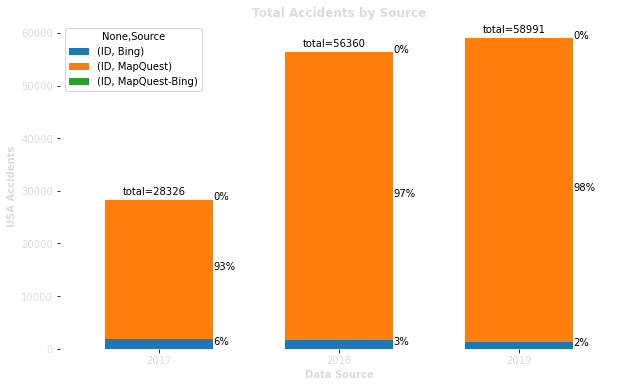

In [6]:
# setting up bar plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
 
plot_ser=source_df # data for plot
# plot
plot1=plot_ser.plot.bar(rot=0,width=0.6, stacked=True)

plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Data Source', fontweight="bold", color=color_t)
plt.ylabel('USA Accidents',fontweight='bold', color=color_t)
plt.title("Total Accidents by Source", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# loop to anotate values on the plot
for i, r in plot_ser.iterrows():
#    off=50000
    d1=r[0]
    d2=r[1]
    d3=r[2]
    d=d1+d2+d3
    plt.text(i-2017+.3, y =d1/2 , s=f"{(d1/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+.3, y =d1+d2/2 , s=f"{(d2/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+0.3, y =d3+d1+d2 , s=f"{(d3/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017-0.2, y =d3+d1+d2+1000 , s=f"total={d}" , fontdict=dict(fontsize=10))
# Save chart as PNG
#plt.savefig('../Analysis/output/YK_US_accidents_source_bar.png', facecolor='dimgray')

In [ ]:
## Data ditribution by State by year 

In [7]:
state_df=traffic_df.groupby(['County','Year']).agg({'ID':'count'}).unstack('Year') # unstacking so we can plot easily
state_df

ID                
Year            2017    2018    2019
County                              
Abbeville       97.0   138.0   112.0
Aiken         1376.0  1297.0  1019.0
Allendale       12.0    32.0    31.0
Anderson      1546.0  3030.0  3410.0
Bamberg         31.0    62.0    85.0
Barnwell        56.0   102.0    67.0
Beaufort       431.0   851.0   710.0
Berkeley       966.0  2102.0  2254.0
Calhoun        191.0   339.0   323.0
Charleston    1005.0  1749.0  1790.0
Cherokee       364.0   934.0   781.0
Chester        177.0   352.0   299.0
Chesterfield   133.0   269.0   288.0
Clarendon      187.0   387.0   309.0
Colleton       368.0   771.0   694.0
Darlington     244.0   559.0   641.0
Dillon         193.0   382.0   436.0
Dorchester     667.0  1308.0  1292.0
Edgefield      175.0   143.0   122.0
Fairfield      169.0   342.0   288.0
Florence       670.0  1434.0  1528.0
Georgetown     197.0   545.0   609.0
Greenville    3809.0  8423.0  9819.0
Greenwood      551.0   585.0   556.0
Hampton         68.0   141.0   126.0
Horry         1554.0  3099.0  3670.0
Jasper         295.0   535.0   433.0
Kershaw        356.0   762.0   722.0
Lancaster      233.0   780.0   595.0
Laurens        484.0   853.0   673.0
Lee            149.0   323.0   237.0
Lexington     2199.0  4179.0  3908.0
Marion          81.0   201.0   221.0
Marlboro        71.0   193.0   222.0
McCormick       29.0    50.0    52.0
Mccormick       25.0    12.0     NaN
Newberry       469.0   511.0   567.0
Oconee         328.0   717.0   942.0
Orangeburg     705.0  1469.0  1574.0
Pickens        345.0   914.0  1101.0
Richland      3371.0  6771.0  6826.0
Saluda         146.0   150.0   168.0
Spartanburg   2575.0  5423.0  6536.0
Sumter         312.0   773.0   759.0
Union           93.0   207.0   226.0
Williamsburg   109.0   228.0   248.0
York           714.0  1933.0  1722.0

posx and posy should be finite values
posx and posy should be finite values


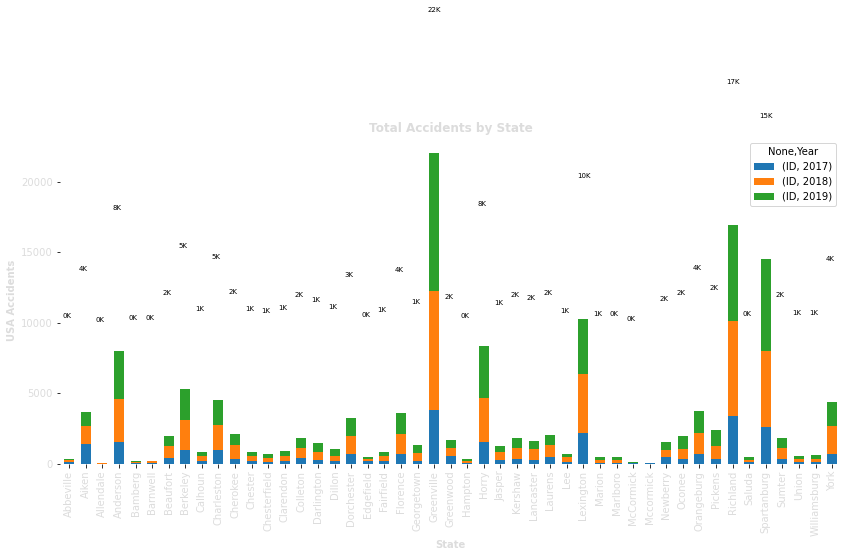

In [8]:
# setting up bar plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 6
 
plot_ser=state_df # data for plot
# plot
plot1=plot_ser.plot.bar(rot=90,width=0.6, stacked=True)

plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('State', fontweight="bold", color=color_t)
plt.ylabel('USA Accidents',fontweight='bold', color=color_t)
plt.title("Total Accidents by State", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# loop to anotate values on the plot
c=0
for i, r in plot_ser.iterrows():
    d1=r[0]
    d2=r[1]
    d3=r[2]
    d=d1+d2+d3
    if d>60000:
        plt.text(c-.3, y =d1/2 , s=f"{(d1/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.3, y =d1+d2/2 , s=f"{(d2/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.3, y =d3/2+d1+d2 , s=f"{(d3/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.5, y =d3+d1+d2+10000 , s=f"{d/1000:.0f}K" , fontdict=dict(fontsize=8))
    else:
        plt.text(c-.4, y =d3+d1+d2+10000 , s=f"{d/1000:.0f}K" , fontdict=dict(fontsize=7))
    c+=1
# Save chart as PNG
#plt.savefig('../Analysis/output/YK_US_accidents_States_bar.png', facecolor='dimgray')

In [19]:
# traffic_df.columns # debug print

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')

In [9]:
traffic_df['Start_Time'][0]

'2017-01-01 00:17:36'

In [9]:
date_df=pd.DataFrame()
date_df['date_time_obj']=pd.to_datetime(traffic_df['Start_Time'])

In [10]:
date_df['Date']=date_df['date_time_obj'].dt.date

In [11]:
date_df['Year']=date_df['date_time_obj'].dt. year

In [12]:
date_df['Month']=date_df['date_time_obj'].dt. month

In [13]:
date_df['Weekday']=date_df['date_time_obj'].dt.weekday

In [14]:
date_df['Severity']=traffic_df['Severity']

In [15]:
date_df['ID']=traffic_df['ID']

In [16]:
date_df

,date_time_obj,Date,Year,Month,Weekday,Severity,ID
12808,2017-01-02 15:22:55,2017-01-02,2017,1,0,2,A-148367
12818,2017-01-02 16:42:09,2017-01-02,2017,1,0,2,A-148377
12819,2017-01-02 16:41:02,2017-01-02,2017,1,0,2,A-148378
12835,2017-01-02 18:05:15,2017-01-02,2017,1,0,3,A-148394
12838,2017-01-02 19:44:39,2017-01-02,2017,1,0,3,A-148397
...,...,...,...,...,...,...,...
2563037,2019-08-22 09:43:07,2019-08-22,2019,8,3,2,A-3512981
2563039,2019-08-22 10:13:08,2019-08-22,2019,8,3,2,A-3512983
2563040,2019-08-22 09:31:08,2019-08-22,2019,8,3,2,A-3512984
2563048,2019-08-22 17:16:16,2019-08-22,2019,8,3,2,A-3512992


In [18]:
year_rate=date_df.groupby(['Year','Month']).agg({'Date':'count'})
year_rate

Date
Year Month      
2017 1       501
     2       520
     3       562
     4       463
     5       386
     6       460
     7       741
     8      5282
     9      4707
     10     5281
     11     5099
     12     4324
2018 1      5156
     2      5168
     3      5472
     4      5394
     5      5991
     6      3960
     7      4074
     8      4109
     9      3606
     10     5065
     11     4282
     12     4083
2019 1      4387
     2      3653
     3      4143
     4      4827
     5      4973
     6      4449
     7      4776
     8      4892
     9      5028
     10     6198
     11     5897
     12     5768

Text(0, 0.5, 'Count')

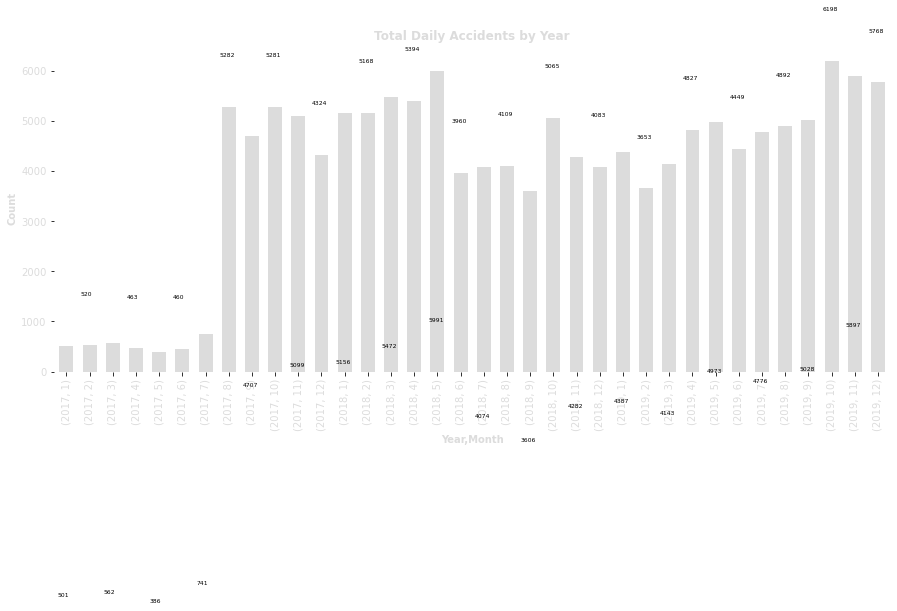

In [19]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plot5= plt.subplot(111)
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Year', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.title("Total Daily Accidents by Year", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plot_ser=year_rate['Date']
plot5=plot_ser.plot.bar(rot=90,color=color_t,width=0.6)
for i,d in enumerate(plot_ser):
    if i%2==0:
        off=5000
    else:
        off=-1000
    plt.text(x=i-.4 , y =d-off , s=f"{d}" , fontdict=dict(fontsize=6))
plt.ylabel('Count')    



In [20]:
#date_df.drop(date_df.loc[date_df['Year']==2017].index)
date_df=date_df[date_df['Year']!=2017]

In [21]:
month_rate=date_df.groupby(['Month']).agg({'Date':'count'})

In [22]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

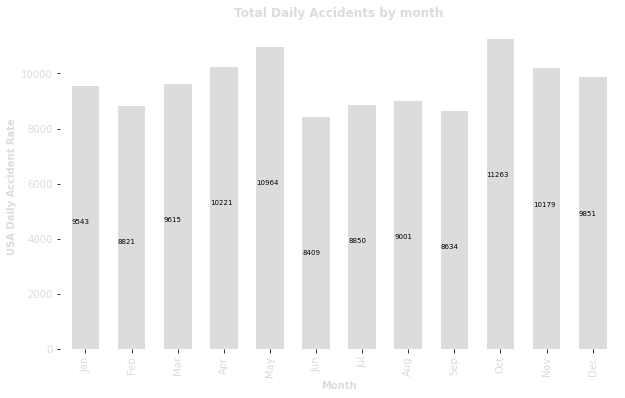

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x=month_rate.index
y=month_rate['Date']
plot5=month_rate['Date'].plot.bar(rot=90,color=color_t,width=0.6)
plt.title("Total Daily Accidents by month", fontweight="bold", color=color_t)    
plt.xlabel('Month', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,12),months, color=color_t,fontsize=10)
for i,d in enumerate(month_rate['Date']):
    plt.text(x=i-.3 , y =d-5000 , s=f"{d}" , fontdict=dict(fontsize=7))

In [24]:
weekday_rate=date_df.groupby(['Weekday']).agg({'Date':'count','Month':'mean'})
weekday_rate

,Date,Month
Weekday,,
0,21250,6.766729
1,21469,6.585915
2,20801,6.516225
3,20147,6.382389
4,23064,6.708160
5,4613,5.988294
6,4007,6.240579


In [25]:
daily_accidents={}
daily_stats=pd.DataFrame()
for i in range(0,7):
    daily_accidents[i]=date_df.loc[date_df['Weekday']==i].groupby(['Date']).agg({'Date':'count', 'Year':'mean','Month':'mean'})
    daily_stats[i]=daily_accidents[i].describe()['Date']

In [26]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
daily_stats

,0,1,2,3,4,5,6
count,105.000000,105.000000,104.000000,104.000000,104.000000,103.000000,104.000000
mean,202.380952,204.466667,200.009615,193.721154,221.769231,44.786408,38.528846
std,52.272470,46.449531,45.674342,59.039637,56.672836,28.816407,24.333427
min,33.000000,11.000000,31.000000,35.000000,99.000000,6.000000,3.000000
25%,171.000000,176.000000,175.250000,167.250000,183.000000,23.000000,19.000000
50%,195.000000,200.000000,198.500000,196.000000,219.000000,38.000000,31.500000
75%,236.000000,238.000000,233.250000,227.500000,250.500000,65.000000,56.000000
max,381.000000,321.000000,300.000000,343.000000,413.000000,121.000000,110.000000


In [27]:
daily_accidents[0]

,Date,Year,Month
Date,,,
2018-01-01,33,2018,1
2018-01-08,237,2018,1
2018-01-15,231,2018,1
2018-01-22,162,2018,1
2018-01-29,272,2018,1
...,...,...,...
2019-12-02,262,2019,12
2019-12-09,251,2019,12
2019-12-16,274,2019,12



 0  
 iqr= 65.0
 UPPER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-04-23   347  2018      4
2019-11-25   341  2019     11
2019-12-23   381  2019     12}
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-01-01    33  2018      1}
----------------------------------------

 1  
 iqr= 62.0
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-01-01    33  2018      1, 1:             Date  Year  Month
Date                         
2018-12-25    11  2018     12}
----------------------------------------

 2  
 iqr= 58.0
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-01-01    33  2018      1, 1:             Date  Year  Month
Date                         
2018-12-25    11  2018     12, 2:             Date  Year  Month
Date                         
2018-12-26    57  2018     12
2019-12-25  

<function matplotlib.pyplot.show(*args, **kw)>

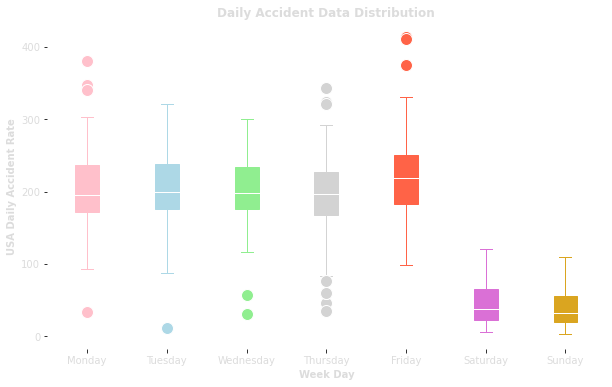

In [28]:
upper_outlier={}
lower_outlier={}
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey','tomato','orchid','goldenrod']    # colors for plot
for i in range(0,7):                                
    data=daily_accidents[i]['Date'] 
    upperq =daily_stats[i]['75%']
    lowerq =daily_stats[i]['25%']
    iqr = upperq - lowerq                                    # iqr                      
    upper_outlier[i]=daily_accidents[i].loc[data>upperq+iqr*1.5]  # finding and storing all upper outliers
    lower_outlier[i]=daily_accidents[i].loc[data<lowerq-iqr*1.5]  # finding and storing all lower outliers
    # printing results
    print('\n\033[1m\033[4m', i,'\033[0m \n','\033[1miqr=\033[0m',iqr)
    if upper_outlier[i].empty:
        print('\033[1m UPPER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m UPPER OUTLIER \033[0m ','\n',upper_outlier)
    if lower_outlier[i].empty:
        print('\033[1m LOWER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m LOWER OUTLIER \033[0m ','\n',lower_outlier)
    print("-"*40)
    c=colors[i]                             # color for each regiment chart
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# "Data-Ink Ratio" applied
    plot1.boxplot(data, 
                  patch_artist=True, widths=0.3,labels=[i],
                  boxprops=dict(facecolor=c, color=c),
                  capprops=dict(color=c),
                  whiskerprops=dict(color=c),
                  flierprops=dict(marker='o',markerfacecolor=c,markeredgecolor="white",markersize=12, label="shown"),
                  medianprops=dict(color='white'),
                  positions=[i])

plt.title("Daily Accident Data Distribution", fontweight="bold", color=color_t)    
plt.xlabel('Week Day', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,7),weekdays, color=color_t,fontsize=10)
#plt.label()
plt.show

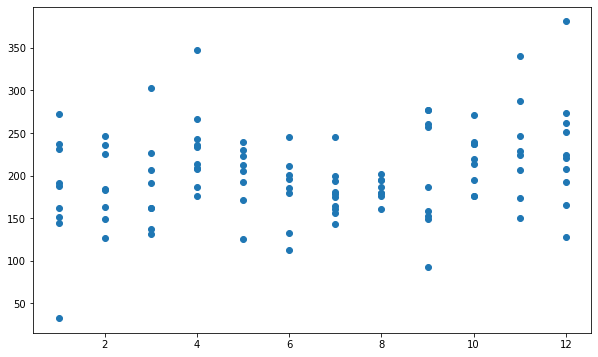

In [29]:
plot2=plt.scatter(daily_accidents[0]['Month'],daily_accidents[0]['Date'])

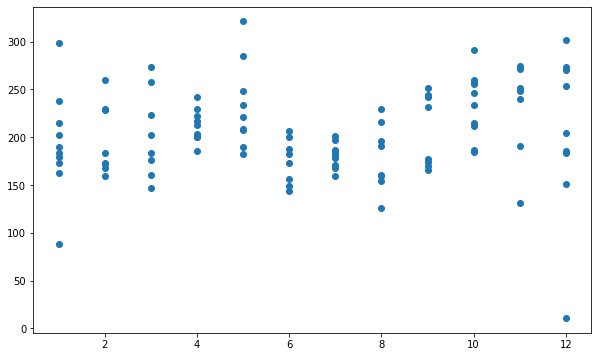

In [30]:
y=daily_accidents[1]['Date']
plot2=plt.scatter(daily_accidents[1]['Month'],y)

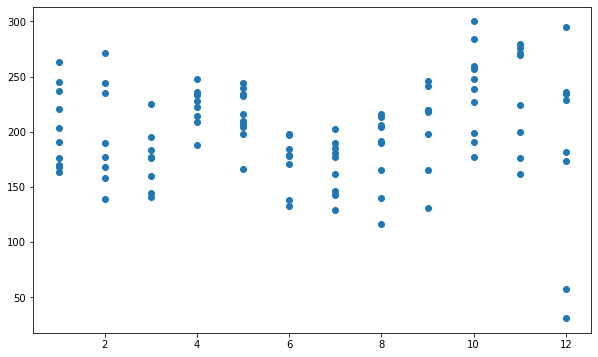

In [31]:
plot2=plt.scatter(daily_accidents[2]['Month'],daily_accidents[2]['Date'] )

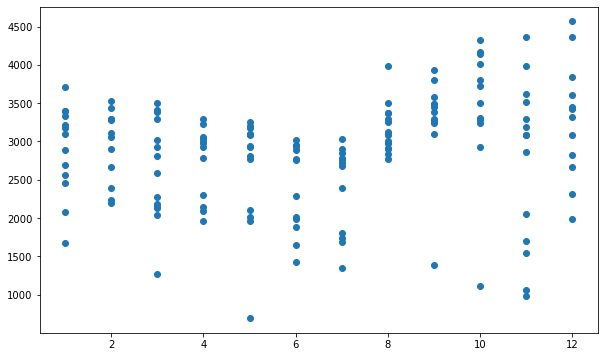

In [243]:
plot2=plt.scatter(daily_accidents[3]['Month'],daily_accidents[3]['Date'] )